<a href="https://colab.research.google.com/github/xxxnmxhj00/Deep-Learning/blob/main/5_2%20%EC%BB%A8%EB%B3%BC%EB%A3%A8%EC%85%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
# 피처 스케일링
# 0~1 범위로 만든다

x_train = np.reshape(x_train / 255,(-1,28,28,1))
x_test = np.reshape(x_test / 255,(-1,28,28,1))

In [ ]:
print(f'x_train.shape: {x_train.shape},x_test.shape: {x_test.shape}')

x_train.shape: (60000, 28, 28, 1),x_test.shape: (10000, 28, 28, 1)


In [ ]:

# 정답 레이블링
# 각 데이터의 레이블을 범주형 형태로 변경
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print(f'y_train.shape:{y_train.shape},y_test.shape:{y_test.shape}')

y_train.shape:(60000, 10),y_test.shape:(10000, 10)


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.3,random_state=777)

In [ ]:
print(f'x_train.shape:{x_train.shape},x_test.shape:{x_test.shape},x_val.shape:{x_val.shape}')
print(f'y_train.shape:{y_train.shape},y_test.shape:{y_test.shape},y_val.shape:{y_val.shape}')

x_train.shape:(42000, 28, 28, 1),x_test.shape:(10000, 28, 28, 1),x_val.shape:(18000, 28, 28, 1)
y_train.shape:(42000, 10),y_test.shape:(10000, 10),y_val.shape:(18000, 10)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense, Flatten, Input

model = Sequential([Input(shape = x_train.shape[1:]),
                    Conv2D(filters=16,kernel_size=3,strides =(1,1), padding='same',activation='relu', input_shape = x_train.shape[1:]),
                    MaxPool2D(pool_size=(2, 2), strides = 2, padding = 'same'),
                    Conv2D(filters=32,kernel_size=3,strides =(1,1),padding='same',activation='relu'),
                    MaxPool2D(pool_size=(2, 2), strides = 2, padding = 'same'),
                    Conv2D(filters=64,kernel_size=3,strides =(1,1),padding='same',activation='relu'),
                    MaxPool2D(pool_size=(2, 2), strides = 2, padding = 'same'),
                    Flatten(),
                    Dense(64,activation='relu'),
                    Dense(10,activation='softmax')
                ])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

history=model.fit(x_train,y_train,epochs=30,batch_size = 128,
          validation_data=(x_val,y_val))

Epoch 1/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - acc: 0.6544 - loss: 1.0069 - val_acc: 0.8478 - val_loss: 0.4281
Epoch 2/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - acc: 0.8568 - loss: 0.4026 - val_acc: 0.8742 - val_loss: 0.3544
Epoch 3/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.8733 - loss: 0.3477 - val_acc: 0.8744 - val_loss: 0.3449
Epoch 4/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - acc: 0.8918 - loss: 0.3066 - val_acc: 0.8860 - val_loss: 0.3172
Epoch 5/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.8944 - loss: 0.2865 - val_acc: 0.8908 - val_loss: 0.3036
Epoch 6/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9002 - loss: 0.2730 - val_acc: 0.8988 - val_loss: 0.2838
Epoch 7/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9108 - loss: 0.2453 - val_acc: 0.8960 - val_loss: 0.2970
Epoch 8/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9146 - loss: 0.2318 - val_acc: 0.9057 - val_loss: 0.2641
Epoch 9/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - a

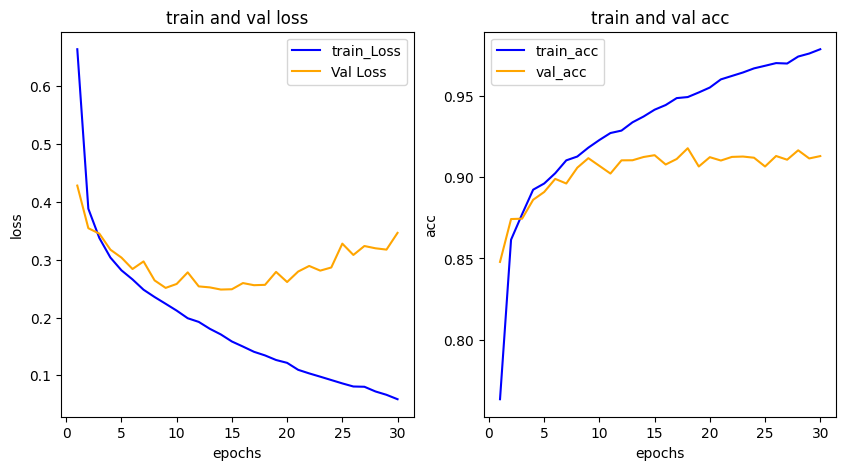

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_Loss')
ax1.plot(epochs, val_loss, color='orange', label='Val Loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

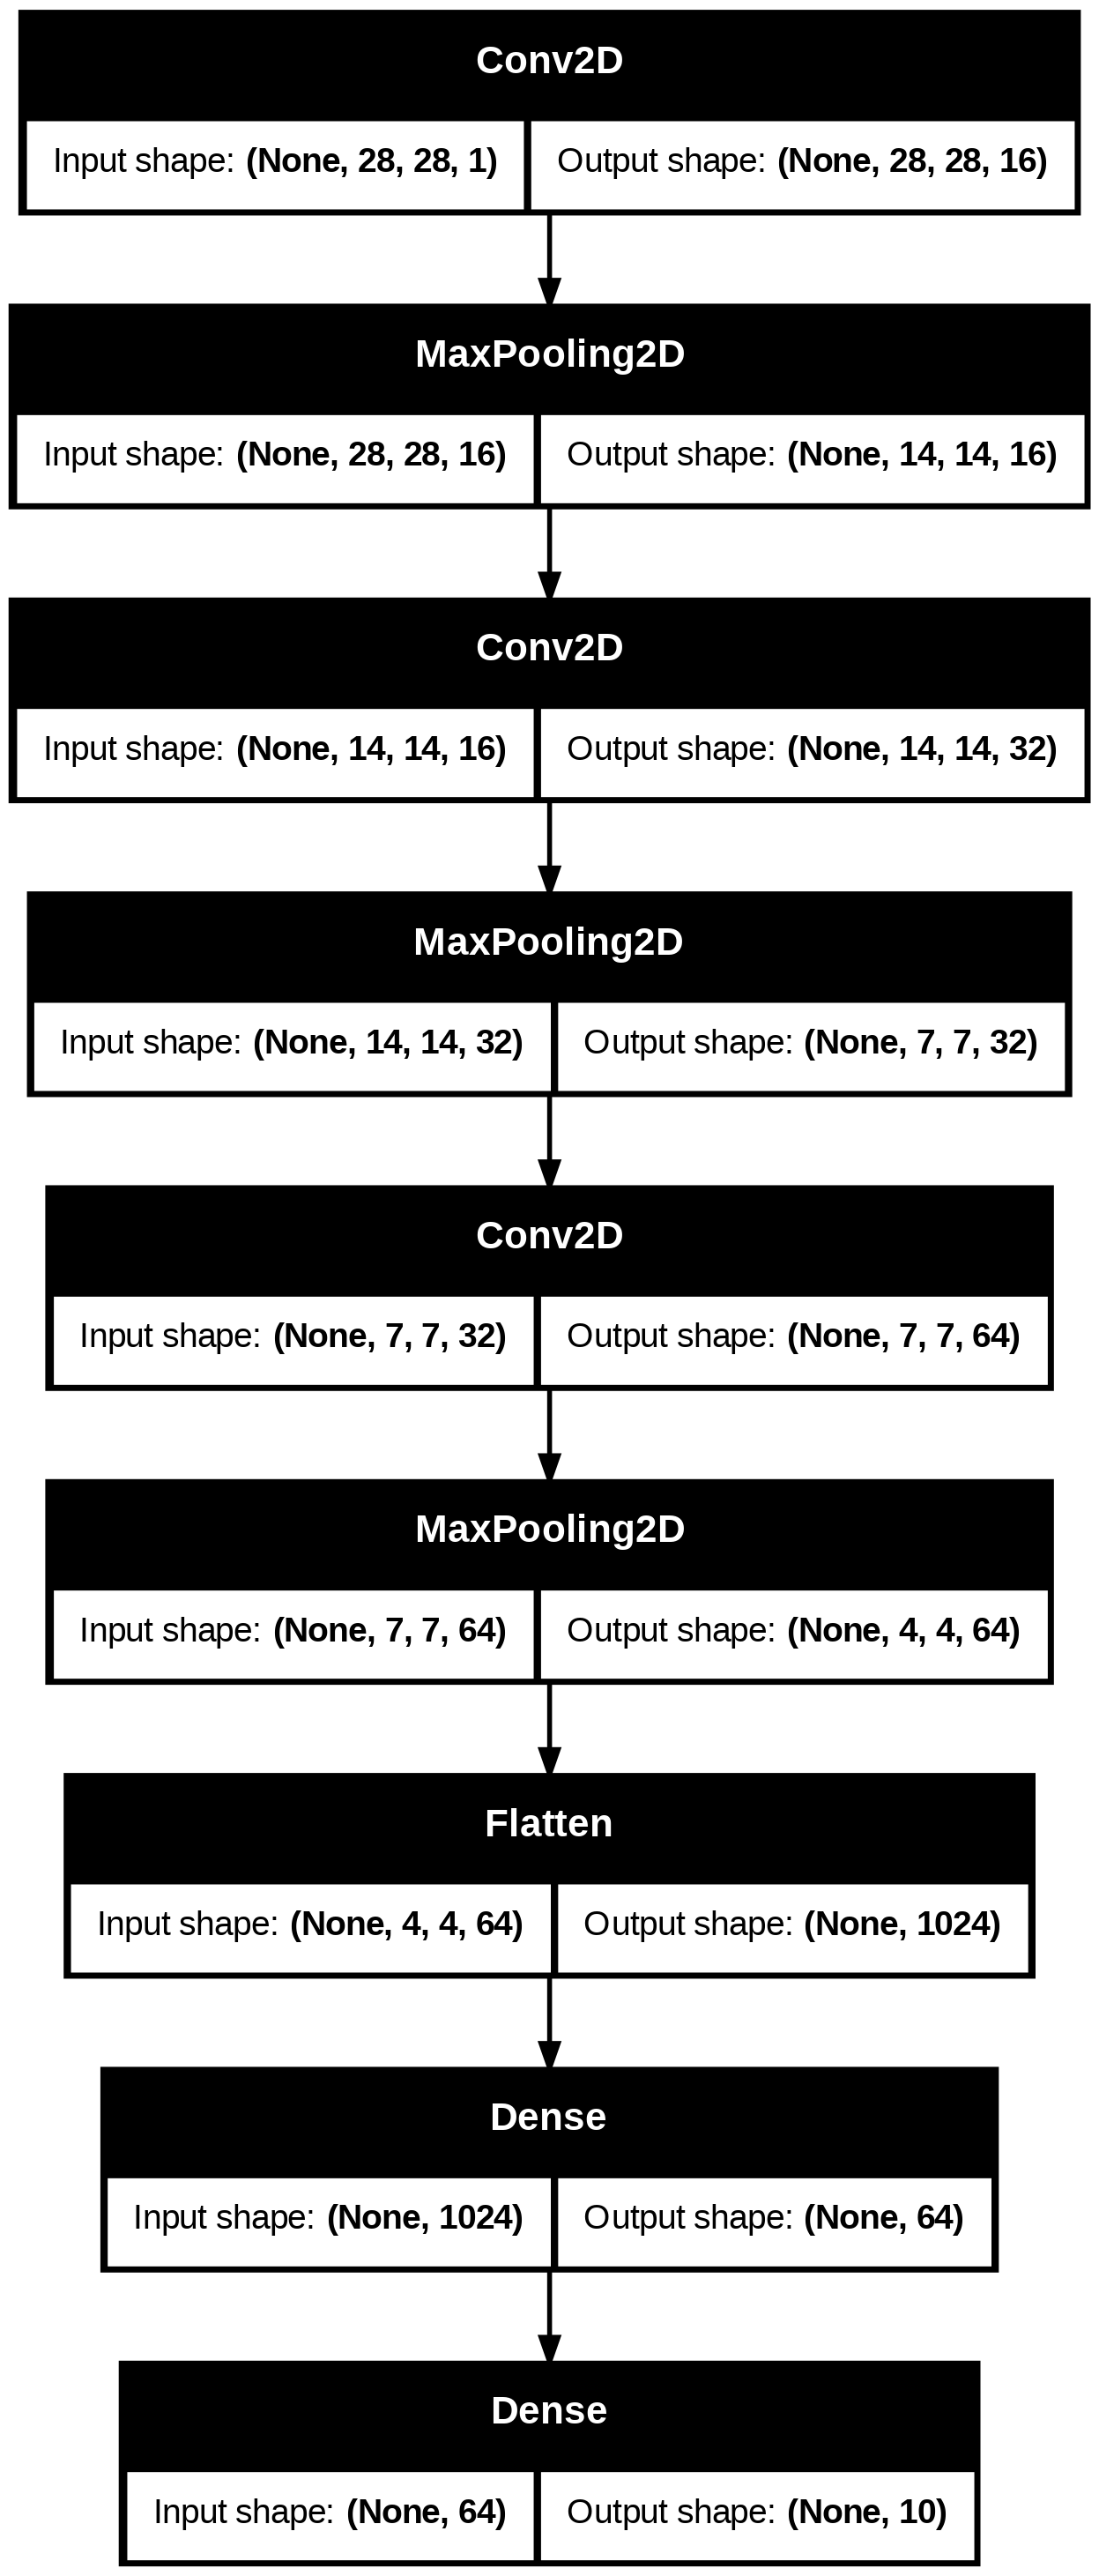

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,'./model.png',show_shapes=True)

In [ ]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9102 - loss: 0.3867


[0.37758639454841614, 0.9082000255584717]

In [ ]:
# 결과 비교를 통해 Fashion-Mnist 데이터셋에서는 컨볼루션 신경망으로 높은 성능을 얻기가 더 어려운